In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, column

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement).order_by(measurement.date.desc()).first()

print(most_recent_date.date)


2017-08-23


([<matplotlib.axis.XTick at 0x22bf7319e70>,
 [Text(0.0, 0, '2016-08-23'),
  Text(78.0, 0, '2016-11-09'),
  Text(158.0, 0, '2017-01-28'),
  Text(238.0, 0, '2017-04-18'),
  Text(321.0, 0, '2017-07-10')])

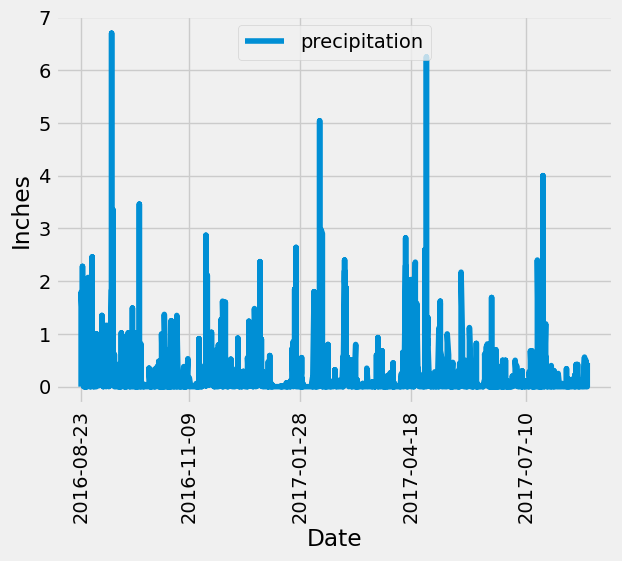

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
year_data = session.query(measurement).\
    filter(measurement.date >= '2016-08-23').all()
data_list = []
for row in year_data:
    data_list.append({
        'id': row.id,
        'station': row.station,
        'date': row.date,
        'prcp': row.prcp,
        'tobs': row.tobs
    })

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_data_df=pd.DataFrame(data_list)
# Sort the dataframe by date
year_data_df.dropna(inplace=True)
year_data_df = year_data_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
date_data = year_data_df['date']
inches_data = year_data_df['prcp']

plt.plot(date_data, inches_data, label='precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)
plt.legend(loc='upper center')

plt.xticks(['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10'])


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_summary_stats_df = pd.DataFrame(year_data_df['prcp'].describe())
prcp_summary_stats_df

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.station)).scalar()
print(station_count)

9


In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)) \
                         .group_by(measurement.station) \
                         .order_by(func.count(measurement.station).desc()) \
                         .all()

for row in active_stations:
    print(row)                  


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs), 
       func.avg(measurement.tobs)]

specific_station_id = 'USC00519281'

temperature_stats = session.query(*sel) \
                           .filter(measurement.station == specific_station_id) \
                           .all()

print(temperature_stats)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


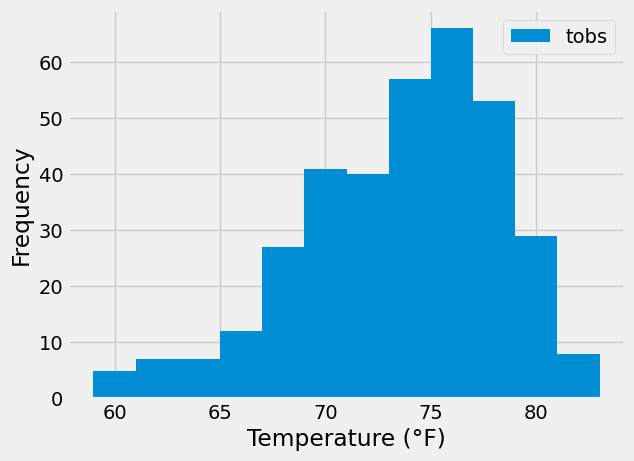

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

year_station_data = session.query(measurement) \
    .filter(measurement.date >= '2016-08-23') \
    .filter(measurement.station == specific_station_id) \
    .all()

data_list = []
for row in year_station_data:
    data_list.append({
        'id': row.id,
        'station': row.station,
        'date': row.date,
        'prcp': row.prcp,
        'tobs': row.tobs
    })

temperature_data = [entry['tobs'] for entry in data_list]

plt.hist(temperature_data, bins=12, label='tobs')
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()


# Close Session

In [28]:
# Close Session
session.close()